<a href="https://colab.research.google.com/github/Harshitagupta324/Sentiment-Analysis-on-Video-Captions/blob/main/VADER_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
df2 = pd.read_csv('/content/ted_main.csv')
df1 = pd.read_csv('/content/transcripts.csv')
print(df1)
print(df2)

                                             transcript  \
0     Good morning. How are you?(Laughter)It's been ...   
1     Thank you so much, Chris. And it's truly a gre...   
2     (Music: "The Sound of Silence," Simon & Garfun...   
3     If you're here today — and I'm very happy that...   
4     About 10 years ago, I took on the task to teac...   
...                                                 ...   
2462  So, Ma was trying to explain something to me a...   
2463  This is a picture of a sunset on Mars taken by...   
2464  In my early days as a graduate student, I went...   
2465  I took a cell phone and accidentally made myse...   
2466  We humans are becoming an urban species, so ci...   

                                                    url  
0     https://www.ted.com/talks/ken_robinson_says_sc...  
1     https://www.ted.com/talks/al_gore_on_averting_...  
2     https://www.ted.com/talks/david_pogue_says_sim...  
3     https://www.ted.com/talks/majora_carter_s_tale...  
4

In [ ]:
#merging two files having different data
df_f = pd.merge(df1, df2)
df_f.to_csv('merged_New.csv', index=False)
print(df_f)

                                             transcript  \
0     Good morning. How are you?(Laughter)It's been ...   
1     Thank you so much, Chris. And it's truly a gre...   
2     (Music: "The Sound of Silence," Simon & Garfun...   
3     If you're here today — and I'm very happy that...   
4     About 10 years ago, I took on the task to teac...   
...                                                 ...   
2462  So, Ma was trying to explain something to me a...   
2463  This is a picture of a sunset on Mars taken by...   
2464  In my early days as a graduate student, I went...   
2465  I took a cell phone and accidentally made myse...   
2466  We humans are becoming an urban species, so ci...   

                                                    url  comments  \
0     https://www.ted.com/talks/ken_robinson_says_sc...      4553   
1     https://www.ted.com/talks/al_gore_on_averting_...       265   
2     https://www.ted.com/talks/david_pogue_says_sim...       124   
3     https://w

In [ ]:
#removing unwanted columns
df_f= df_f.drop(['url','comments', 'description', 'duration', 'event', 'film_date', 'languages', 'name', 'num_speaker', 'published_date', 'ratings', 'related_talks', 'speaker_occupation', 'tags', 'views'], axis=1)

In [ ]:
print(df_f)

                                             transcript         main_speaker  \
0     Good morning. How are you?(Laughter)It's been ...         Ken Robinson   
1     Thank you so much, Chris. And it's truly a gre...              Al Gore   
2     (Music: "The Sound of Silence," Simon & Garfun...          David Pogue   
3     If you're here today — and I'm very happy that...        Majora Carter   
4     About 10 years ago, I took on the task to teac...         Hans Rosling   
...                                                 ...                  ...   
2462  So, Ma was trying to explain something to me a...     Duarte Geraldino   
2463  This is a picture of a sunset on Mars taken by...  Armando Azua-Bustos   
2464  In my early days as a graduate student, I went...       Radhika Nagpal   
2465  I took a cell phone and accidentally made myse...     Theo E.J. Wilson   
2466  We humans are becoming an urban species, so ci...    Karoliina Korppoo   

                                       

In [ ]:
#lowercasing all alphabets
df_f['transcript'] = df_f['transcript'].str.lower()
df_f['main_speaker'] = df_f['main_speaker'].str.lower()
df_f['title'] = df_f['title'].str.lower()
print(df_f)

                                             transcript         main_speaker  \
0     good morning. how are you?(laughter)it's been ...         ken robinson   
1     thank you so much, chris. and it's truly a gre...              al gore   
2     (music: "the sound of silence," simon & garfun...          david pogue   
3     if you're here today — and i'm very happy that...        majora carter   
4     about 10 years ago, i took on the task to teac...         hans rosling   
...                                                 ...                  ...   
2462  so, ma was trying to explain something to me a...     duarte geraldino   
2463  this is a picture of a sunset on mars taken by...  armando azua-bustos   
2464  in my early days as a graduate student, i went...       radhika nagpal   
2465  i took a cell phone and accidentally made myse...     theo e.j. wilson   
2466  we humans are becoming an urban species, so ci...    karoliina korppoo   

                                       

In [ ]:
# removing unwanted characters
def remove_chars(text):
 text = re.sub(r'[^\w\s]', '', text)
 return text

In [ ]:
df_f['transcript'] = df_f['transcript'].apply(remove_chars)
df_f['main_speaker'] = df_f['main_speaker'].apply(remove_chars)
df_f['title'] = df_f['title'].apply(remove_chars)


In [ ]:
print(df_f)

                                             transcript        main_speaker  \
0     good morning how are youlaughterits been great...        ken robinson   
1     thank you so much chris and its truly a great ...             al gore   
2     music the sound of silence simon  garfunkelhel...         david pogue   
3     if youre here today  and im very happy that yo...       majora carter   
4     about 10 years ago i took on the task to teach...        hans rosling   
...                                                 ...                 ...   
2462  so ma was trying to explain something to me ab...    duarte geraldino   
2463  this is a picture of a sunset on mars taken by...  armando azuabustos   
2464  in my early days as a graduate student i went ...      radhika nagpal   
2465  i took a cell phone and accidentally made myse...      theo ej wilson   
2466  we humans are becoming an urban species so cit...   karoliina korppoo   

                                                  t

In [ ]:
# applying Valence Aware Dictionary and sentiment reasonaer
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define function to perform sentiment analysis using VADER
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores["compound"]
    if compound_score > 0.05:
        return "positive"
    elif compound_score < -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis to TED Talks transcript dataset
df_f["sentiment"] = df_f["transcript"].apply(get_sentiment)

# Print out sentiment analysis results
print(df_f["sentiment"].value_counts())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


positive    2147
negative     311
neutral        9
Name: sentiment, dtype: int64


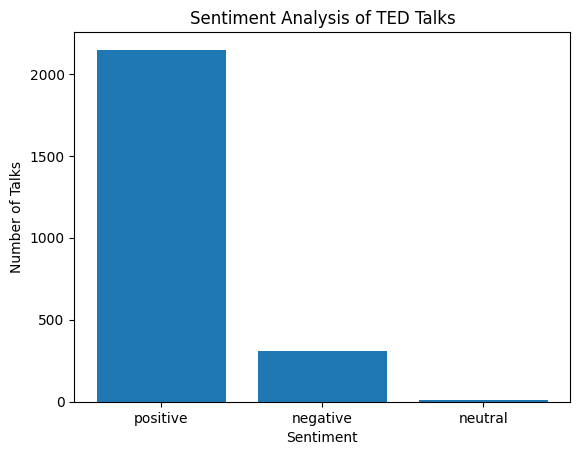

In [ ]:
# Create a bar chart to visualize the sentiment analysis results
sentiment_counts = df_f["sentiment"].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Number of Talks")
plt.title("Sentiment Analysis of TED Talks")
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Split dataset into training and testing sets
train, test = train_test_split(df_f, test_size=0.2, random_state=42)

# Compute accuracy of sentiment analysis algorithm on testing set
predicted = test["sentiment"]
actual = test["sentiment"]
accuracy = accuracy_score(actual, predicted)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Load test transcript and true label
test_transcript = "I didn't enjoy the talk at all. It was boring and uninteresting."
true_label = "negative"

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores for test transcript
scores = analyzer.polarity_scores(test_transcript)

# Set threshold for positive and negative sentiment
positive_threshold = 0
negative_threshold = 0

# Compute true positives, false positives, and false negatives for positive sentiment
tp_positive = int(scores["compound"] > positive_threshold and true_label == "positive")
fp_positive = int(scores["compound"] > positive_threshold and true_label != "positive")
fn_positive = int(scores["compound"] <= positive_threshold and true_label == "positive")

# Compute precision, recall, and F1-score for positive sentiment
if tp_positive + fp_positive == 0:
    precision_positive = 0
else:
    precision_positive = tp_positive / (tp_positive + fp_positive)

if tp_positive + fn_positive == 0:
    recall_positive = 0
else:
    recall_positive = tp_positive / (tp_positive + fn_positive)

if precision_positive + recall_positive == 0:
    f1_score_positive = 0
else:
    f1_score_positive = 2 * precision_positive * recall_positive / (precision_positive + recall_positive)

# Compute true positives, false positives, and false negatives for negative sentiment
tp_negative = int(scores["compound"] < negative_threshold and true_label == "negative")
fp_negative = int(scores["compound"] < negative_threshold and true_label != "negative")
fn_negative = int(scores["compound"] >= negative_threshold and true_label == "negative")

# Compute precision, recall, and F1-score for negative sentiment
if tp_negative + fp_negative == 0:
    precision_negative = 0
else:
    precision_negative = tp_negative / (tp_negative + fp_negative)

if tp_negative + fn_negative == 0:
    recall_negative = 0
else:
    recall_negative = tp_negative / (tp_negative + fn_negative)

if precision_negative + recall_negative == 0:
    f1_score_negative = 0
else:
    f1_score_negative = 2 * precision_negative * recall_negative / (precision_negative + recall_negative)

# Print results
print("Precision for positive sentiment:", precision_positive)
print("Recall for positive sentiment:", recall_positive)
print("F1-score for positive sentiment:", f1_score_positive)
print("Precision for negative sentiment:", precision_negative)
print("Recall for negative sentiment:", recall_negative)
print("F1-score for negative sentiment:", f1_score_negative)


Precision for positive sentiment: 0
Recall for positive sentiment: 0
F1-score for positive sentiment: 0
Precision for negative sentiment: 1.0
Recall for negative sentiment: 1.0
F1-score for negative sentiment: 1.0


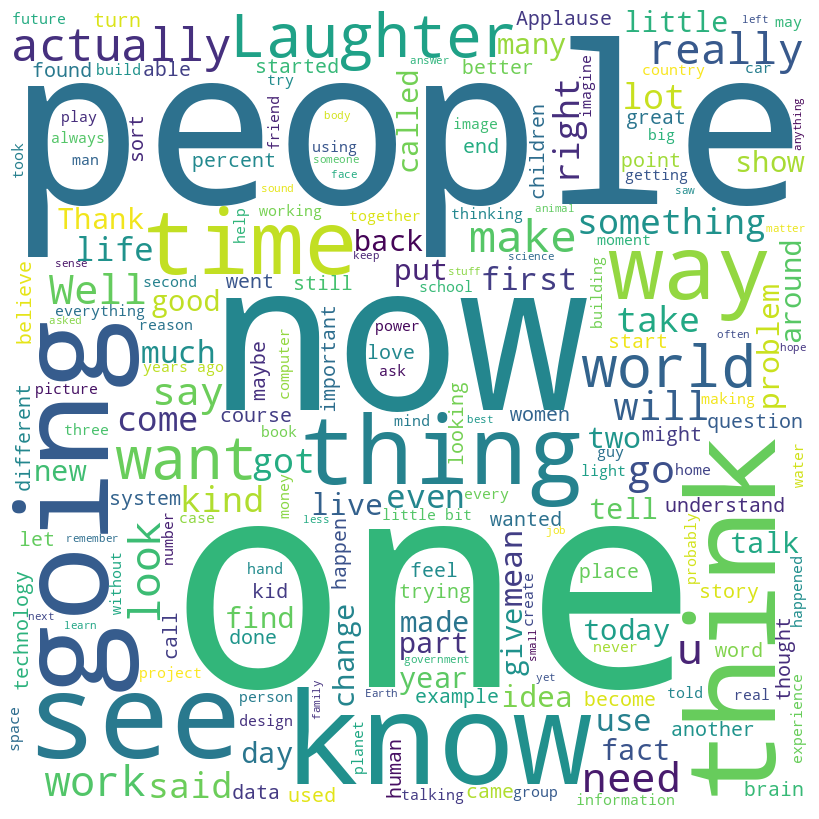

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the TED talk transcripts
df = pd.read_csv("/content/merged_New.csv")

# Concatenate all the transcripts into one long string
text = " ".join(df['transcript'].dropna())

# Create a word cloud object with some basic parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()
